In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploring working directory 

In [2]:
import os

wd = os.getcwd()  # stores the name of the current directory in a string
os.listdir(wd)  # outputs the contents of the directory in a list

['.ipynb_checkpoints',
 'battledeath.xlsx',
 'chapter1.pdf',
 'chapter2.pdf',
 'disarea.dta',
 'hello_world.txt',
 'importing_flat_files.ipynb',
 'Importing_non_flat_file_types.ipynb',
 'L-L1_LOSC_4_V1-1126259446-32.hdf5',
 'mnist_digits.csv',
 'pickled_fruit.pkl',
 'sales.sas7bdat',
 'titanic_sub.csv']

## Loading a pickled file 

When we are unsure on how to store datatypes, they can be imported into python by serializing them. Converting the object into a sequence of bytes or bytestream.

In [3]:
import pickle

with open("pickled_fruit.pkl", "rb") as file:
    data = pickle.load(file)

print(data)

['apple', 'orange', 'lemon', 'lime']


## Importing an Excel file 

In [4]:
xls = pd.ExcelFile("battledeath.xlsx")
xls.sheet_names  # shows the names of the worksheets

['2002', '2004']

Individual sheets can be converted into data frames by parsing them.

In [5]:
df1 = xls.parse("2002")
df1.head()

,"War, age-adjusted mortality due to",2002
0,Afghanistan,36.083990
1,Albania,0.128908
2,Algeria,18.314120
3,Andorra,0.000000
4,Angola,18.964560


In [6]:
df1 = xls.parse(0)  # alternative method by using index of Excel Sheet
df1.head()

,"War, age-adjusted mortality due to",2002
0,Afghanistan,36.083990
1,Albania,0.128908
2,Algeria,18.314120
3,Andorra,0.000000
4,Angola,18.964560


In [7]:
df1 = xls.parse(0, skiprows=[0], names=['Country','Score']) # skips the first row and renames the columns.
df1.head()

,Country,Score
0,Albania,0.128908
1,Algeria,18.314120
2,Andorra,0.000000
3,Angola,18.964560
4,Antigua and Barbuda,0.000000


## SAS & Stata files

In [8]:
from sas7bdat import SAS7BDAT

with SAS7BDAT('sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

In [9]:
df_sas.head()

,YEAR,P,S
0,1950.0,12.9,181.899994
1,1951.0,11.9,245.000000
2,1952.0,10.7,250.199997
3,1953.0,11.3,265.899994
4,1954.0,11.2,248.500000


The data are adapted from the website of the undergraduate text book Principles of Econometrics by Hill, Griffiths and Lim.

In [10]:
data = pd.read_stata('disarea.dta')
data.head()

,wbcode,country,disa1,disa2,disa3,disa4,disa5,disa6,disa7,disa8,...,disa16,disa17,disa18,disa19,disa20,disa21,disa22,disa23,disa24,disa25
0,AFG,Afghanistan,0.00,0.00,0.76,0.73,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.02,0.00,0.00
1,AGO,Angola,0.32,0.02,0.56,0.00,0.0,0.00,0.56,0.0,...,0.0,0.4,0.0,0.61,0.00,0.0,0.99,0.98,0.61,0.00
2,ALB,Albania,0.00,0.00,0.02,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.16
3,ARE,United Arab Emirates,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
4,ARG,Argentina,0.00,0.24,0.24,0.00,0.0,0.23,0.00,0.0,...,0.0,0.0,0.0,0.00,0.05,0.0,0.00,0.01,0.00,0.11


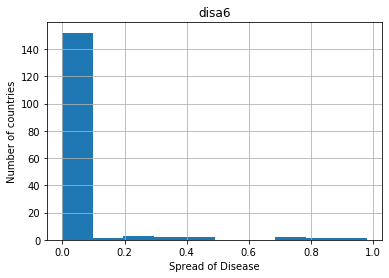

In [11]:
pd.DataFrame.hist(data[['disa6']]) # creating a histogram for one column
plt.xlabel('Spread of Disease')
plt.ylabel('Number of countries')
plt.show()

## HDF5 files 

Stands for hierarchical Data Format version 5. Standard for storing large quantities of numerical data.

In [12]:
import h5py

In [13]:
data = h5py.File('L-L1_LOSC_4_V1-1126259446-32.hdf5','r') # r is to read
print(type(data))

<class 'h5py._hl.files.File'>


In [14]:
for key in data.keys():
    print(key)

meta
quality
strain


The 3 levels of a HDF5 file system are meta(meta-data), quaity(refers to data quality) and strain(strain data from the interferometer). These values are obtained from the Laser Interferometer Gravitational-Wave Observatory (LIGO) experiment.

In [15]:
for key in data['meta'].keys():
    print(key)

Description
DescriptionURL
Detector
Duration
GPSstart
Observatory
Type
UTCstart


In [16]:
print(data['meta']['Observatory'].value)

b'L'


D:\anaconda3\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


## Matlab files 

In [17]:
import scipy.io

In [18]:
mat = scipy.io.loadmat('ja_data2.mat')
print(type(mat))

<class 'dict'>


In [19]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])

In [20]:
print(type(mat['cfpNuc']))

<class 'numpy.ndarray'>


In [22]:
print(np.shape(mat['cfpNuc']))

(200, 137)
